## Netflix Data Visualization


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Data Visualization

In [3]:
movies_df = df[df['type'] == 'Movie']
top10countries_movies = movies_df.groupby(['country']).size().sort_values(ascending=False)[0:10]

top10countries_movies

country
United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
dtype: int64

Lets turn it into bar graph

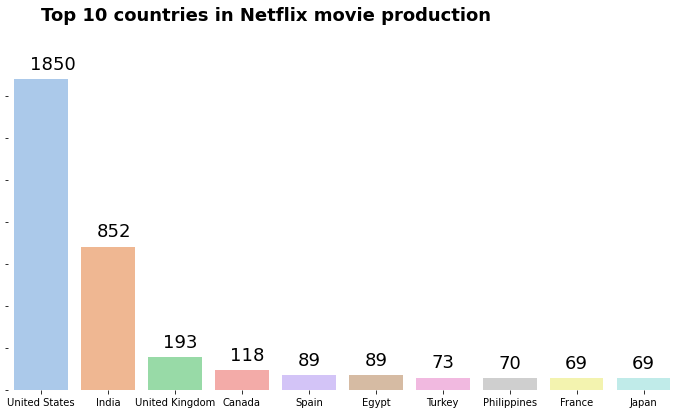

In [4]:
plt.figure(figsize=(12,6))
g =sns.barplot(x = top10countries_movies.index, y = top10countries_movies, palette = 'pastel') #pastel
g.text(0, 2200, 'Top 10 countries in Netflix movie production', fontsize = 18, fontweight='bold', color = 'black')

for i in ['top', 'bottom', 'left', 'right']:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(i.get_x() + i.get_width()/3.5,
    i.get_height() +60,
    round(i.get_height()),
    fontsize = '18')

g.set(yticklabels = [])
plt.xlabel('')
plt.ylabel('')

plt.show()


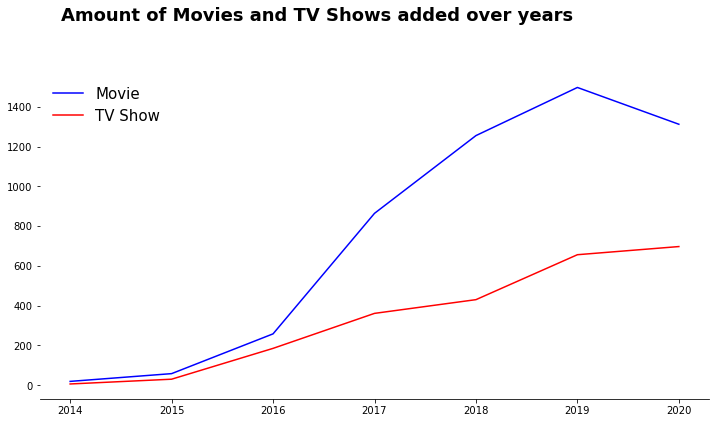

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
index = [2014,2015,2016,2017,2018,2019,2020]

#Movies add from 2004 to 2020
ts_df = df[df['year_added']>2013]
ts_df = ts_df[ts_df['year_added']<2021].groupby('type')['year_added'].value_counts().unstack().T

fig, ax = plt.subplots(1,1, figsize =(12,6))
fig.text(0.15, 1, 'Amount of Movies and TV Shows added over years', fontsize = 18, fontweight = 'bold', color = 'black')

# Line charts
g1 = sns.lineplot(x=ts_df.index, y= ts_df['Movie'], color = 'blue', label = 'Movie')
g2 = sns.lineplot(x=ts_df.index, y=ts_df['TV Show'], color = 'red', label = 'TV Show')

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)
    
ax.legend(loc = 'upper left', frameon=False, prop = {'size': 15})
plt.xlabel('')
plt.ylabel('')

plt.show()